# Handling MISSING VALUES

In [7]:
# Handling MISSING VALUES
# DROP ROWS or COLUMNS
#Main Libraries
import pandas as pd

# Read the data in the CSV file using pandas
df = pd.read_csv('/Users/manoranjandash/Desktop/SCALE_TEACHING/MLCourse_SEPT/creditcardfraud/data1.csv')

print("Shape before removing missing value = ", df.shape)
print(df)
print('\n')

print("Number of missing values = ", df.isnull().any().sum())
#Drop the rows where at least one element is missing.
#df.dropna()
print("Shape after removing the row with missing value = ", df.dropna().shape)
print("Shape after removing the col with missing value = ", df.dropna(axis=1).shape)


Shape before removing missing value =  (11, 4)
    Country  Hours   Salary House
0    France     34  12000.0    No
1     Spain     37  49000.0   Yes
2   Germany     20  34000.0    No
3     Spain     58  41000.0    No
4   Germany     40  43333.0   Yes
5    France     45  28000.0   Yes
6     Spain     40  51000.0    No
7    France     28  89000.0   Yes
8   Germany     50  53000.0    No
9    France     47  33000.0   Yes
10  Germany     38      NaN    No


Number of missing values =  1
Shape after removing the row with missing value =  (10, 4)
Shape after removing the col with missing value =  (11, 3)


In [8]:
# Handling MISSING VALUES
# IMPUTE
import pandas as pd
# Read the data in the CSV file using pandas
#df = pd.read_csv('C:\\Users\\mdash\\Desktop\\MLCourse_SEPT\\creditcardfraud\\data1.csv')
df = pd.read_csv('/Users/manoranjandash/Desktop/SCALE_TEACHING/MLCourse_SEPT/creditcardfraud/data1.csv')

print("Total missing values before IMPUTATION: ", df.isnull().any().sum())

# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)
print("Total missing values after IMPUTATION: ", df.isnull().any().sum())
print("IMPUTED VALUE = ", df.Salary[10])
print(df)

Total missing values before IMPUTATION:  1
Total missing values after IMPUTATION:  0
IMPUTED VALUE =  43333.3
    Country  Hours   Salary House
0    France     34  12000.0    No
1     Spain     37  49000.0   Yes
2   Germany     20  34000.0    No
3     Spain     58  41000.0    No
4   Germany     40  43333.0   Yes
5    France     45  28000.0   Yes
6     Spain     40  51000.0    No
7    France     28  89000.0   Yes
8   Germany     50  53000.0    No
9    France     47  33000.0   Yes
10  Germany     38  43333.3    No


# LABELENCODER

In [134]:
#LABELENCODER
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the dataset from csv fiel using pandas library
dataset = pd.read_csv('/Users/manoranjandash/Desktop/SCALE_TEACHING/MLCourse_SEPT/creditcardfraud/data1.csv')
print("Before LabelEncoding: ")
print(dataset)
print('\n')
# Create a matrix X of independent variables Country, Hours, Salary
X = dataset.iloc[:, :-1].values # Here first : means fetch all rows :-1 means except last column
Y = dataset.iloc[:, 3].values # : is fetch all rows 3 means 3rd column

# Let's create an object of the class LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0]) # All rows and first column i.e country column
print("After LabelEncoding: ")
print(X)
le_name_mapping = dict(zip(labelencoder_X.classes_, labelencoder_X.transform(labelencoder_X.classes_)))
print("Mapping: ", le_name_mapping)


Before LabelEncoding: 
    Country  Hours        Salary House
0    France     34 12000.0000000    No
1     Spain     37 49000.0000000   Yes
2   Germany     20 34000.0000000    No
3     Spain     58 41000.0000000    No
4   Germany     40 43333.0000000   Yes
5    France     45 28000.0000000   Yes
6     Spain     40 51000.0000000    No
7    France     28 89000.0000000   Yes
8   Germany     50 53000.0000000    No
9    France     47 33000.0000000   Yes
10  Germany     38           nan    No


After LabelEncoding: 
[[0 34 12000.0]
 [2 37 49000.0]
 [1 20 34000.0]
 [2 58 41000.0]
 [1 40 43333.0]
 [0 45 28000.0]
 [2 40 51000.0]
 [0 28 89000.0]
 [1 50 53000.0]
 [0 47 33000.0]
 [1 38 nan]]
Mapping:  {'France': 0, 'Germany': 1, 'Spain': 2}


# ONE HOT ENCODING using sklearn.preprocessing.OneHotEncoder and pandas.get_dummies

In [69]:
#ONE HOT ENCODING using sklearn.preprocessing.OneHotEncoder and pandas.get_dummies
import pandas as pd
from numpy import array
from numpy import argmax
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Read the dataset from csv fiel using pandas library
#dataset = pd.read_csv('data.csv')
df = pd.read_csv('/Users/manoranjandash/Desktop/SCALE_TEACHING/MLCourse_SEPT/creditcardfraud/data1.csv')
dataset = df.dropna()
print(dataset)

# ONE HOT ENCODING using sklearn OneHotEncoder
# Create a matrix X of independent variables Country, Hours, Salary
X = dataset.iloc[:, :-1].values # Here first : means fetch all rows :-1 means except last column
data = X[:, 0]
values = array(data)

values = values.reshape(len(values), 1)
onehot_encoded = OneHotEncoder().fit_transform(values).toarray()
X1 = np.zeros((10, 5), dtype=int)
X1[:, 0:3] = onehot_encoded
X1[:, 3] = X[:, 1]
X1[:, 4] = X[:, 2]
print("\nONE HOT ENCODING using sklearn.OneHotEncoder:")
df1 = pd.DataFrame(X1)
df1.columns = ['Country_France', 'Country_Germany', 'Country_Spain', 'Hours', 'Salary']
print(df1)

# ONE HOT ENCODING using sklearn pandas.getDummies()
print("\nONE HOT ENCODING using pandas.get_dummies():")
print(pd.get_dummies(dataset.iloc[:, :-1]))

   Country  Hours   Salary House
0   France     34  12000.0    No
1    Spain     37  49000.0   Yes
2  Germany     20  34000.0    No
3    Spain     58  41000.0    No
4  Germany     40  43333.0   Yes
5   France     45  28000.0   Yes
6    Spain     40  51000.0    No
7   France     28  89000.0   Yes
8  Germany     50  53000.0    No
9   France     47  33000.0   Yes

ONE HOT ENCODING using sklearn.OneHotEncoder:
   Country_France  Country_Germany  Country_Spain  Hours  Salary
0               1                0              0     34   12000
1               0                0              1     37   49000
2               0                1              0     20   34000
3               0                0              1     58   41000
4               0                1              0     40   43333
5               1                0              0     45   28000
6               0                0              1     40   51000
7               1                0              0     28   89000
8    

# DIFFERENCE BETWEEN MinMaxScaler, Normalize and StandardScaler

In [135]:
# DIFFERENCE BETWEEN MinMaxScale Normalize and StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

df = pd.DataFrame({'COL1': [1,2,3], 'COL2': [10,20,30],\
                   'COL3': [100,200,300], 'COL4': [1000,2000,3000]})
df.columns=['COL1', 'COL2', 'COL3', 'COL4']
print('ORIGINAL DATA:')
print(df)

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)
df1.columns=['COL1', 'COL2', 'COL3', 'COL4']
print('\nMinMaxScaler DATA:')
print(df1)

df2 = preprocessing.normalize(x)
df2_2 = pd.DataFrame(df2)
print('\nNormalize DATA:')
print(df2_2.round(10))

standard_scaler = preprocessing.StandardScaler()
x_standardized = standard_scaler.fit_transform(x)
df3 = pd.DataFrame(x_standardized)
print('\nStandardize DATA:')
print(df3)

ORIGINAL DATA:
   COL1  COL2  COL3  COL4
0     1    10   100  1000
1     2    20   200  2000
2     3    30   300  3000

MinMaxScaler DATA:
       COL1      COL2      COL3      COL4
0 0.0000000 0.0000000 0.0000000 0.0000000
1 0.5000000 0.5000000 0.5000000 0.5000000
2 1.0000000 1.0000000 1.0000000 1.0000000

Normalize DATA:
          0         1         2         3
0 0.0009950 0.0099499 0.0994987 0.9949874
1 0.0009950 0.0099499 0.0994987 0.9949874
2 0.0009950 0.0099499 0.0994987 0.9949874

Standardize DATA:
           0          1          2          3
0 -1.2247449 -1.2247449 -1.2247449 -1.2247449
1  0.0000000  0.0000000  0.0000000  0.0000000
2  1.2247449  1.2247449  1.2247449  1.2247449


# PCA: PRINCIPAL COMPONENTS ANALYSIS for Visualization

In [105]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [106]:
df.shape

(150, 5)

In [107]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1000000,3.5000000,1.4000000,0.2000000,Iris-setosa
1,4.9000000,3.0000000,1.4000000,0.2000000,Iris-setosa
2,4.7000000,3.2000000,1.3000000,0.2000000,Iris-setosa
3,4.6000000,3.1000000,1.5000000,0.2000000,Iris-setosa
4,5.0000000,3.6000000,1.4000000,0.2000000,Iris-setosa


In [108]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [109]:
x[0:5,:]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [110]:
y[0:5]

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa']], dtype=object)

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [112]:
principalDf.head()

,principal component 1,principal component 2
0,-2.2645417,0.5057039
1,-2.0864255,-0.6554047
2,-2.3679504,-0.3184773
3,-2.3041972,-0.5753677
4,-2.3887775,0.6747674


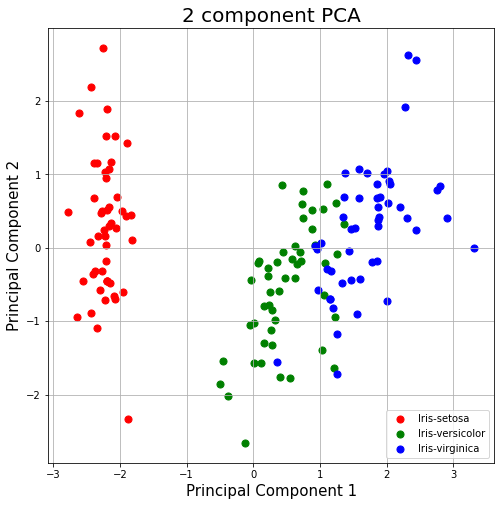

In [113]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [114]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# TRAIN/TEST SPLIT

In [136]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [137]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [138]:
y[0:5]

array([151.,  75., 141., 206., 135.])

In [139]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [140]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [141]:
predictions[0:5]

array([167.22800944, 100.77032018, 149.34203637, 144.03303092,
       190.69647727])

Text(0, 0.5, 'Predictions')

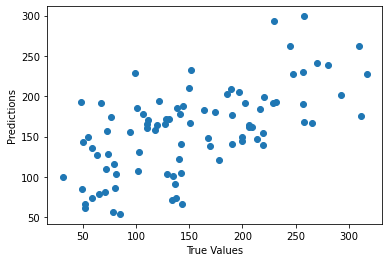

In [143]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [144]:
print('Score: ', model.score(X_test, y_test))

Score:  0.36858014177896137


# K-FOLD CROSS VALIDATION

In [145]:
# Necessary imports: 
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


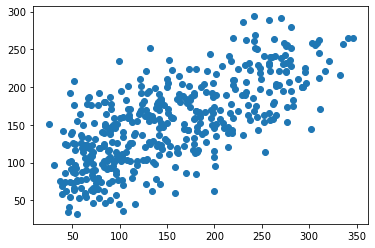

In [146]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

# Leave-One-Out Cross Validation

In [147]:
    from sklearn import linear_model
    import numpy as np
    from sklearn.model_selection import LeaveOneOut
    loo = LeaveOneOut()
    lmLOOCV = linear_model.LinearRegression()
    X = np.array(df)
    square_error_sum = 0.0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = lmLOOCV.fit(X_train, y_train)
        predicted_y = model.predict(X_test)
        square_error_sum += float(y_test[0] - predicted_y) ** 2
    mse = square_error_sum / X.shape[0]
    print('-----------------------')
    print('Leave One Out?mse ' , mse)
    print('-----------------------')

-----------------------
Leave One Out?mse  3001.7462317329437
-----------------------
